In [1]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
okt = Okt()
kkma = Kkma()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import re
from collections import Counter

import warnings
warnings.simplefilter("ignore")

from wordcloud import WordCloud
import matplotlib.pyplot as plt


from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# 기초 불용어 처리
from nltk.corpus import stopwords

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 형태소 벡터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 벡터를 학습 벡터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer

# 워드 클라우드를 위한 라이브러리
from collections import Counter
# import pytagcloud
from IPython.display import Image

# 저장
import pickle

import json
import ast

In [8]:
tot_df = pd.read_excel(r"C:\Users\NT550009\Desktop\11st\Rate_polar check.xlsx")

In [9]:
tot_df["Grade"].value_counts()

5    5095
4    1341
3     517
1     111
2     103
Name: Grade, dtype: int64

In [21]:
tot_df_grade = tot_df["Grade"].value_counts().reset_index()

In [22]:
tot_df_grade

,index,Grade
0,5,5095
1,4,1341
2,3,517
3,1,111
4,2,103


In [5]:
size_df = pd.read_excel(r"C:\Users\NT550009\Desktop\11st\size_final.xlsx")

In [7]:
size_df["Grade"].value_counts()

5    727
4    202
3     54
1     16
2     12
Name: Grade, dtype: int64

In [17]:
size_df_grade = size_df["Grade"].value_counts().reset_index()

In [18]:
size_df_grade

,index,Grade
0,5,727
1,4,202
2,3,54
3,1,16
4,2,12


In [10]:
no_size_df = pd.read_excel(r"C:\Users\NT550009\Desktop\11st\no_size.xlsx")

In [11]:
no_size_df["Grade"].value_counts()

5    4346
4    1125
3     461
1      94
2      91
Name: Grade, dtype: int64

In [19]:
no_size_df_grade = no_size_df["Grade"].value_counts().reset_index()

In [20]:
no_size_df_grade

,index,Grade
0,5,4346
1,4,1125
2,3,461
3,1,94
4,2,91


In [23]:
merged_size = pd.merge(tot_df_grade.set_index('index'), size_df_grade.set_index('index'), 
                         left_index=True, right_index=True, how='outer')

In [24]:
merged_size

,Grade_x,Grade_y
index,,
5,5095,727
4,1341,202
3,517,54
1,111,16
2,103,12


In [26]:
merged_size.columns

Index(['Grade_x', 'Grade_y'], dtype='object')

In [32]:
merged_size = merged_size.reset_index()

In [33]:
merged_size

,index,Grade_x,Grade_y
0,5,5095,727
1,4,1341,202
2,3,517,54
3,1,111,16
4,2,103,12


In [34]:
merged_size = pd.merge(merged_size.set_index('index'), no_size_df_grade.set_index('index'), 
                         left_index=True, right_index=True, how='outer')

In [35]:
merged_size

,Grade_x,Grade_y,Grade
index,,,
5,5095,727,4346
4,1341,202,1125
3,517,54,461
1,111,16,94
2,103,12,91


In [37]:
merged_size.index


Int64Index([5, 4, 3, 1, 2], dtype='int64', name='index')

In [38]:
merged_size["INDEX"] = [5, 4, 3, 1, 2]

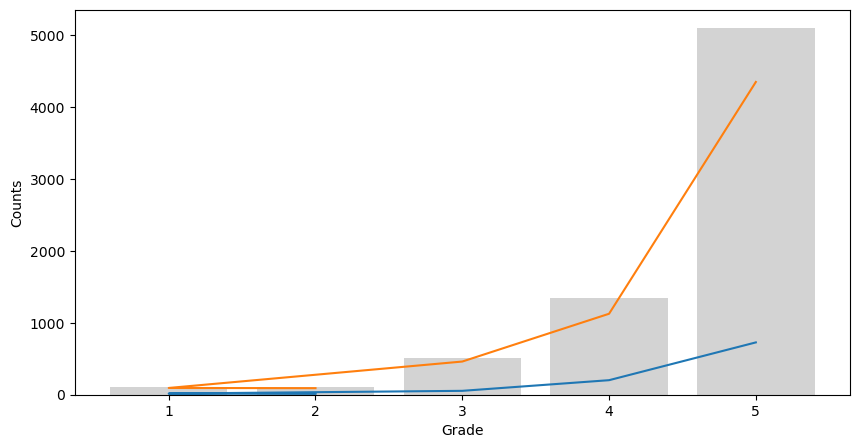

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))

# 선 그래프 그리기
ax.plot(merged_size["INDEX"] , merged_size['Grade_y'], label='size')
ax.plot(merged_size['INDEX'], merged_size['Grade'], label='no_size')
ax.bar(merged_size['INDEX'], merged_size['Grade_x'], color='lightgray')

# 축 라벨 설정
ax.set_xlabel("Grade")
ax.set_ylabel('Counts')

# 범례 설정
# ax.legend()

# 그래프 출력
plt.show()

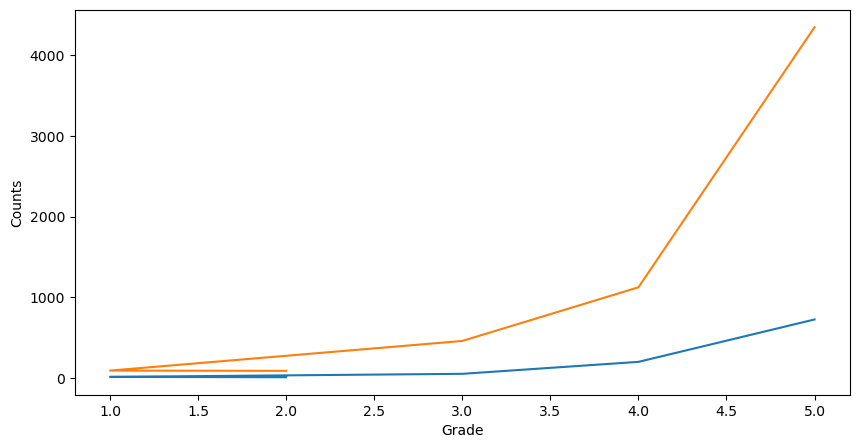

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))

# 선 그래프 그리기
ax.plot(merged_size["INDEX"] , merged_size['Grade_y'], label='size')
ax.plot(merged_size['INDEX'], merged_size['Grade'], label='no_size')

# 축 라벨 설정
ax.set_xlabel("Grade")
ax.set_ylabel('Counts')

# 범례 설정
# ax.legend()

# 그래프 출력
plt.show()